In [1]:
#observing the daily activities of people who wear smart devices

In [2]:
#import my libaries 

In [3]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('dailyActivity_merged.csv')

PREPARE THE DATA 

In [6]:
len(df)

457

In [7]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [9]:
#chech for missing data

In [10]:
df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [11]:
print(df.nunique())

Id                           35
ActivityDate                 32
TotalSteps                  389
TotalDistance               334
TrackerDistance             336
LoggedActivitiesDistance     20
VeryActiveDistance          170
ModeratelyActiveDistance    140
LightActiveDistance         295
SedentaryActiveDistance       8
VeryActiveMinutes            85
FairlyActiveMinutes          62
LightlyActiveMinutes        251
SedentaryMinutes            315
Calories                    383
dtype: int64


In [12]:
#check for duplicates 

In [13]:
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Id, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories]
Index: []


ANALYZE THE DATA 

In [15]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


In [16]:
#analyze rows for outliers 

<Axes: ylabel='TotalSteps'>

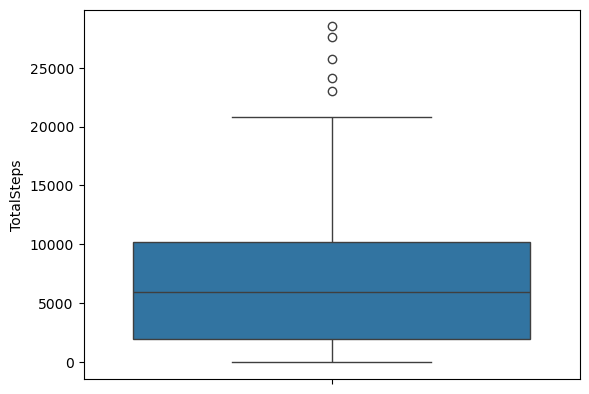

In [17]:
sns.boxplot(df['TotalSteps'])

<Axes: ylabel='TotalDistance'>

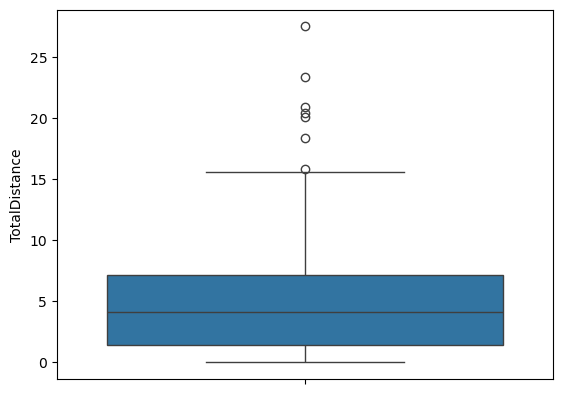

In [18]:
sns.boxplot(df['TotalDistance'])

<Axes: ylabel='TrackerDistance'>

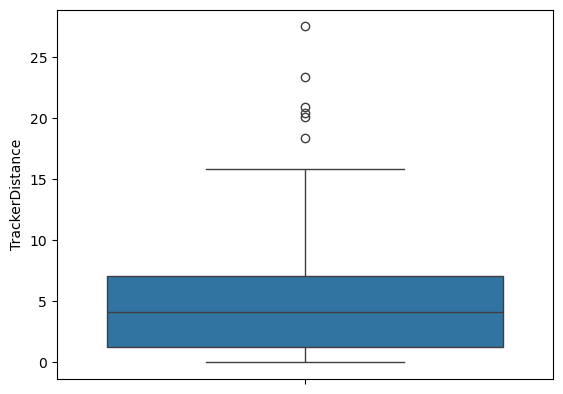

In [19]:
sns.boxplot(df['TrackerDistance'])

<Axes: ylabel='LoggedActivitiesDistance'>

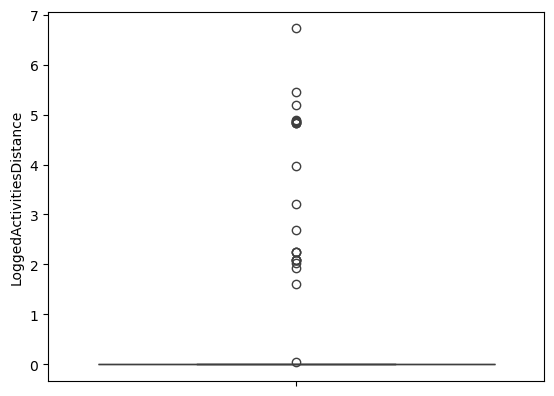

In [20]:
sns.boxplot(df['LoggedActivitiesDistance'])

<Axes: ylabel='VeryActiveDistance'>

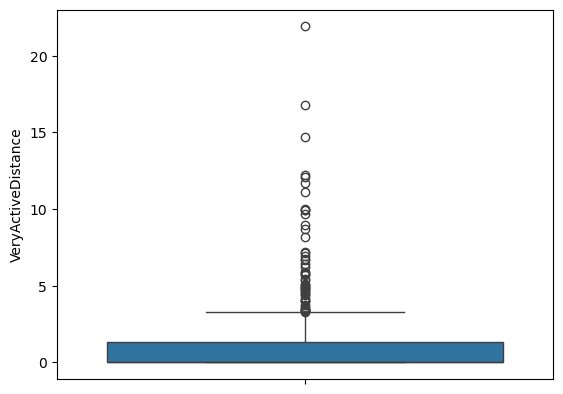

In [21]:
sns.boxplot(df['VeryActiveDistance'])

<Axes: ylabel='SedentaryActiveDistance'>

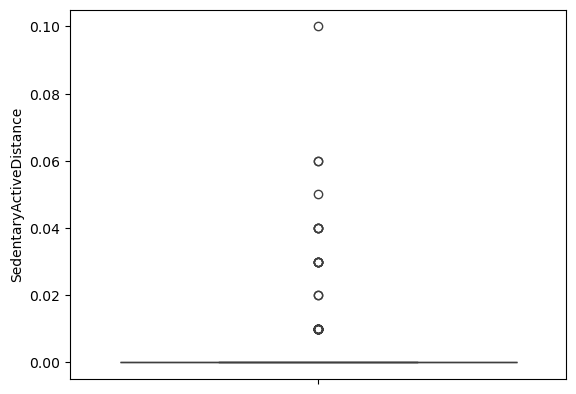

In [22]:
sns.boxplot(df['SedentaryActiveDistance'])

<Axes: ylabel='VeryActiveMinutes'>

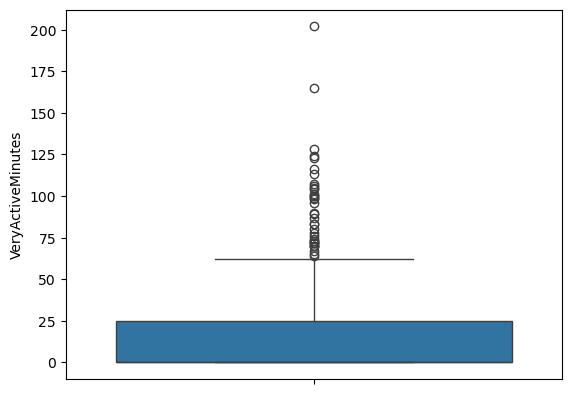

In [23]:
sns.boxplot(df['VeryActiveMinutes'])

<Axes: ylabel='FairlyActiveMinutes'>

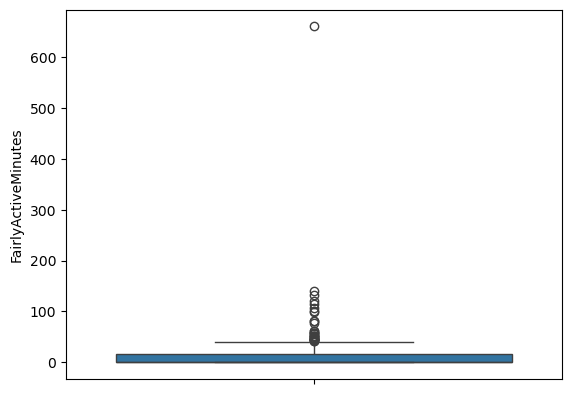

In [24]:
sns.boxplot(df['FairlyActiveMinutes'])

<Axes: ylabel='LightlyActiveMinutes'>

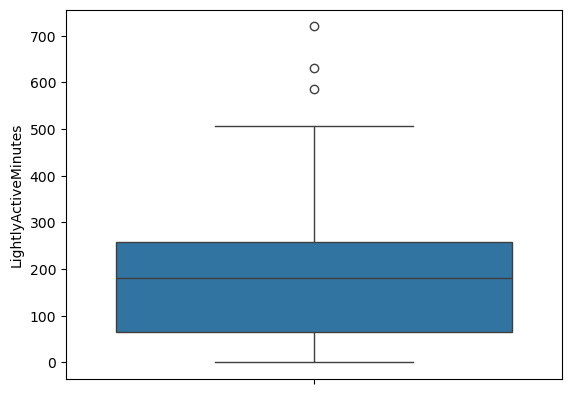

In [25]:
sns.boxplot(df['LightlyActiveMinutes'])

<Axes: ylabel='SedentaryMinutes'>

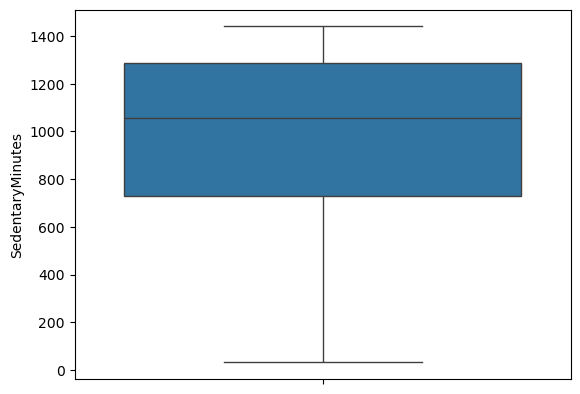

In [26]:
sns.boxplot(df['SedentaryMinutes'])

<Axes: ylabel='Calories'>

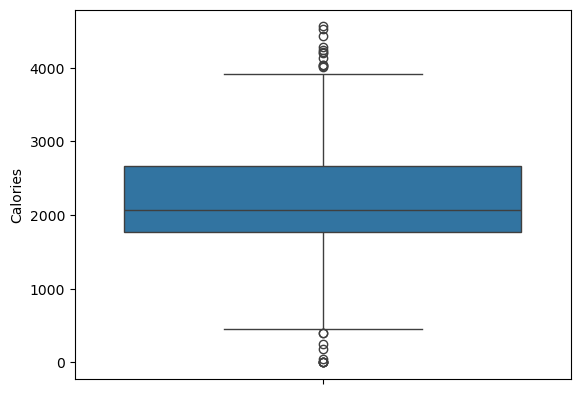

In [27]:
sns.boxplot(df['Calories'])

In [28]:
#chnage the activity date to include day of the week column

In [29]:
df['DayOfTheWeek']= pd.to_datetime(df['ActivityDate'])

In [30]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016-03-25
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016-03-26
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016-03-27
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016-03-28
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016-03-29


In [31]:
df['DayOfTheWeek'] = df['DayOfTheWeek'].dt.day_name()

In [32]:
#observe changes has been made

In [197]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,Friday
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,Saturday
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,Sunday
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,Monday
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,Tuesday


In [34]:
print(df.dtypes)


Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
DayOfTheWeek                 object
dtype: object


In [35]:
cat_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Verify data types
print(df.dtypes)

# Ensure 'DayOfTheWeek' is a categorical type with expected categories
df['DayOfTheWeek'] = pd.Categorical(df['DayOfTheWeek'], categories=cat_week, ordered=True)

# Verify unique values in 'DayOfTheWeek'
print(df['DayOfTheWeek'].cat.categories)

# Perform groupby and calculate the mean of numeric columns
df_weekday = df.groupby('DayOfTheWeek', observed=False).mean(numeric_only=True).reindex(cat_week)

# Filter to include only the 'Calories' column
calories_by_day = df_weekday.filter(['Calories'])

print(calories_by_day)

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
DayOfTheWeek                 object
dtype: object
Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')
                 Calories
DayOfTheWeek             
Monday        2252.867647
Tuesday       1742.424658
Wednesday     2377.458333
Thursday      2297.812500
Friday        2313.547945
Saturday      2277.586667
Sunday        2167.597222


In [36]:
#calculate the calories burnt by the days of the week

In [37]:
cat_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cat_week, ordered=True)
df['DayOfTheWeek'] = df['DayOfTheWeek'].astype(cat_type)
df_weekday = df.groupby('DayOfTheWeek', observed=False).mean(numeric_only=True)

# Reindex to ensure the days are in the correct order
df_weekday = df_weekday.reindex(cat_week)

# Filter the result to only include the 'Calories' column
calories_by_day = df_weekday[['Calories']]

# Display the filtered DataFrame
print(calories_by_day)

                 Calories
DayOfTheWeek             
Monday        2252.867647
Tuesday       1742.424658
Wednesday     2377.458333
Thursday      2297.812500
Friday        2313.547945
Saturday      2277.586667
Sunday        2167.597222


In [38]:
#calculate the avergae total steps taken by the days of the week

In [39]:
TotalSteps_by_day = df_weekday.filter(['TotalSteps'])
print(TotalSteps_by_day)

               TotalSteps
DayOfTheWeek             
Monday        7118.588235
Tuesday       4914.917808
Wednesday     7510.708333
Thursday      6847.083333
Friday        6737.561644
Saturday      7089.773333
Sunday        6058.013889


In [40]:
#calculate the avergae total distance taken by the days of the week

In [41]:
TotalDistance_by_day = df_weekday.filter(['TotalDistance'])
print(TotalDistance_by_day)

              TotalDistance
DayOfTheWeek               
Monday             5.054559
Tuesday            3.489589
Wednesday          5.371458
Thursday           4.850417
Friday             4.853699
Saturday           5.020933
Sunday             4.322778


In [42]:
#plot scatterplot to observe relationship between total steps taken and the calories burnt 

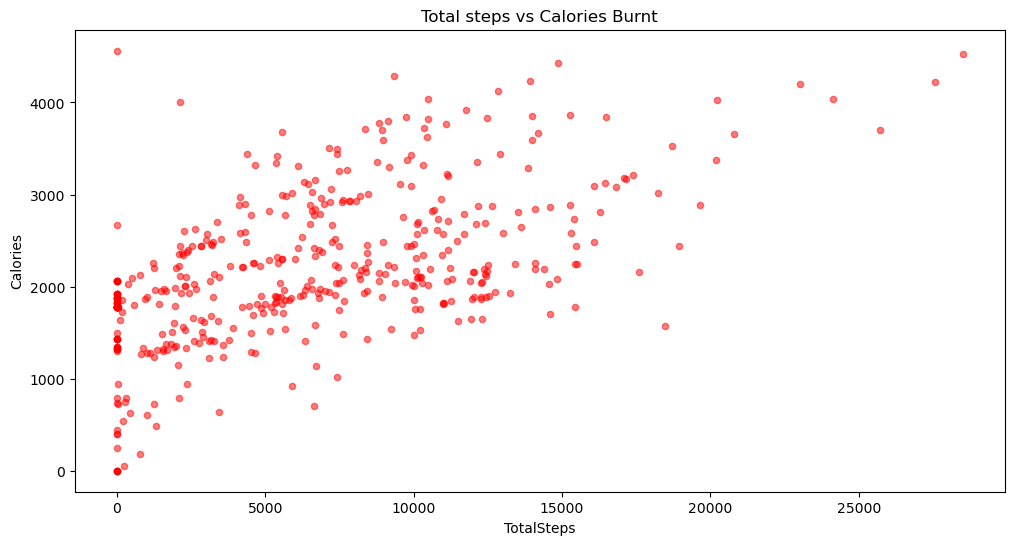

In [43]:
df.plot.scatter(x='TotalSteps', y='Calories', color= 'red', alpha = 0.5, figsize=(12,6))
plt.title('Total steps vs Calories Burnt')
plt.show()

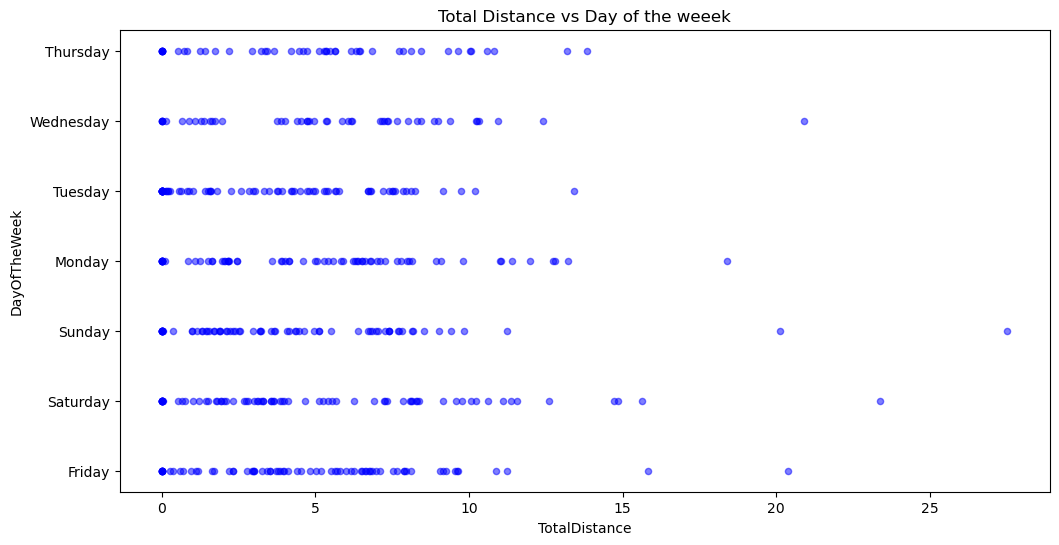

In [44]:
df.plot.scatter(x= 'TotalDistance', y= 'DayOfTheWeek', color= 'blue', alpha = 0.5, figsize=(12,6))
plt.title('Total Distance vs Day of the weeek')
plt.show()

ANALYZE HOURLY STEPS AND HOURLY CALORIES DATA 

In [46]:
d = pd.read_csv('hourlySteps_merged.csv')
d2 = pd.read_csv('hourlyCalories_merged.csv')

In [47]:
d.head()
d2.head()

,Id,ActivityHour,Calories
0,1503960366,3/12/2016 12:00:00 AM,48
1,1503960366,3/12/2016 1:00:00 AM,48
2,1503960366,3/12/2016 2:00:00 AM,48
3,1503960366,3/12/2016 3:00:00 AM,48
4,1503960366,3/12/2016 4:00:00 AM,48


In [48]:
#observe for missing data 

In [49]:
d.isnull().sum()
d2.isnull().sum()

Id              0
ActivityHour    0
Calories        0
dtype: int64

In [50]:
d.info()
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24084 entries, 0 to 24083
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            24084 non-null  int64 
 1   ActivityHour  24084 non-null  object
 2   StepTotal     24084 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 564.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24084 entries, 0 to 24083
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            24084 non-null  int64 
 1   ActivityHour  24084 non-null  object
 2   Calories      24084 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 564.6+ KB


In [51]:
print(d.nunique())
print(d2.nunique())

Id                34
ActivityHour     755
StepTotal       2216
dtype: int64
Id               34
ActivityHour    755
Calories        444
dtype: int64


In [52]:
#analyze the data 

In [53]:
d.describe()

,Id,StepTotal
count,2.408400e+04,24084.000000
mean,4.889424e+09,286.218693
std,2.421566e+09,664.924224
min,1.503960e+09,0.000000
25%,2.347168e+09,0.000000
50%,4.558610e+09,10.000000
75%,6.962181e+09,289.000000
max,8.877689e+09,10565.000000


In [54]:
d2.describe()

,Id,Calories
count,2.408400e+04,24084.000000
mean,4.889424e+09,94.266692
std,2.421566e+09,59.395711
min,1.503960e+09,42.000000
25%,2.347168e+09,61.000000
50%,4.558610e+09,77.000000
75%,6.962181e+09,104.000000
max,8.877689e+09,933.000000


In [55]:
#merge the two data for easy analysis 

In [56]:
merged_hours = pd.merge(d, d2, on= ['ActivityHour', 'Id'])

In [57]:
#observe to see data has been merged 

In [58]:
merged_hours.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,3/12/2016 12:00:00 AM,0,48
1,1503960366,3/12/2016 1:00:00 AM,0,48
2,1503960366,3/12/2016 2:00:00 AM,0,48
3,1503960366,3/12/2016 3:00:00 AM,0,48
4,1503960366,3/12/2016 4:00:00 AM,0,48


In [59]:
#change activity hour to include day of the week and hour column 

In [60]:
merged_hours['ActivityDate'] = pd.to_datetime(d['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

In [61]:
merged_hours['DayOfTheWeek']= pd.to_datetime(merged_hours['ActivityDate'])
merged_hours['DayOfTheWeek'] = merged_hours['ActivityDate'].dt.day_name()
merged_hours['ActivityHour'] = pd.to_datetime(merged_hours['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
merged_hours['Hour'] = merged_hours['ActivityHour'].dt.hour



In [62]:
#observe changes has been made 

In [63]:
merged_hours.head()

,Id,ActivityHour,StepTotal,Calories,ActivityDate,DayOfTheWeek,Hour
0,1503960366,2016-03-12 00:00:00,0,48,2016-03-12 00:00:00,Saturday,0
1,1503960366,2016-03-12 01:00:00,0,48,2016-03-12 01:00:00,Saturday,1
2,1503960366,2016-03-12 02:00:00,0,48,2016-03-12 02:00:00,Saturday,2
3,1503960366,2016-03-12 03:00:00,0,48,2016-03-12 03:00:00,Saturday,3
4,1503960366,2016-03-12 04:00:00,0,48,2016-03-12 04:00:00,Saturday,4


In [64]:
#observe the average calories by the hour 

In [65]:
merged_hours.groupby(merged_hours['ActivityHour'].dt.hour)['Calories'].mean()

ActivityHour
0      72.401567
1      69.606268
2      68.124388
3      67.559372
4      67.770138
5      77.998033
6      80.821850
7      90.598619
8      98.038576
9     106.346535
10    106.392607
11    108.228686
12    113.579317
13    108.553213
14    111.433735
15    105.697487
16    110.272362
17    112.298793
18    115.164149
19    116.328298
20    104.263370
21     92.558022
22     84.809091
23     76.998988
Name: Calories, dtype: float64

In [66]:
#observe the average total steps by the hour 

In [67]:
merged_hours.groupby(merged_hours['ActivityHour'].dt.hour)['StepTotal'].mean()

ActivityHour
0      44.421156
1      20.484819
2      10.588639
3       7.312071
4       9.755403
5      26.113078
6     120.164370
7     267.120316
8     365.596439
9     430.258416
10    437.004995
11    452.745236
12    520.944779
13    457.882530
14    474.124498
15    390.469347
16    447.366834
17    453.663984
18    505.646526
19    528.878147
20    399.317861
21    261.009082
22    172.983838
23    102.901822
Name: StepTotal, dtype: float64

In [68]:
#plot a graph showing the calories burnt by the time of the day 

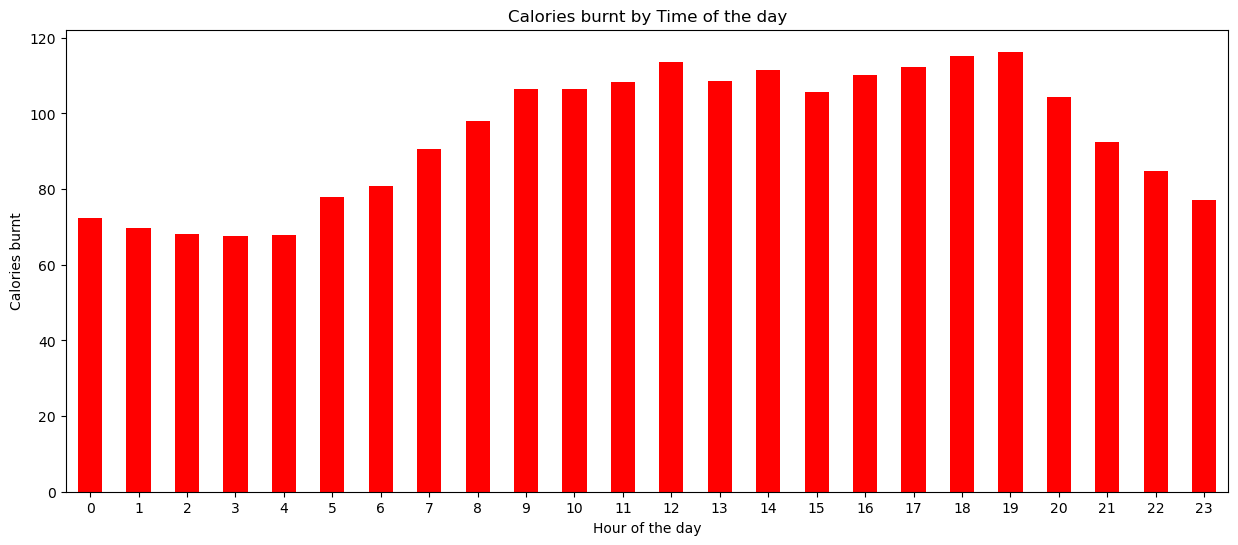

In [69]:
fig, axs = plt.subplots(figsize=(15, 6))
merged_hours.groupby(merged_hours['ActivityHour'].dt.hour)['Calories'].mean().plot(kind='bar', rot=0, ax=axs, color='red', title='Calories burnt by Time of the day')
plt.xlabel("Hour of the day")
plt.ylabel("Calories burnt")
plt.show()

In [70]:
#plot a graph showing the steps taken by the hour 

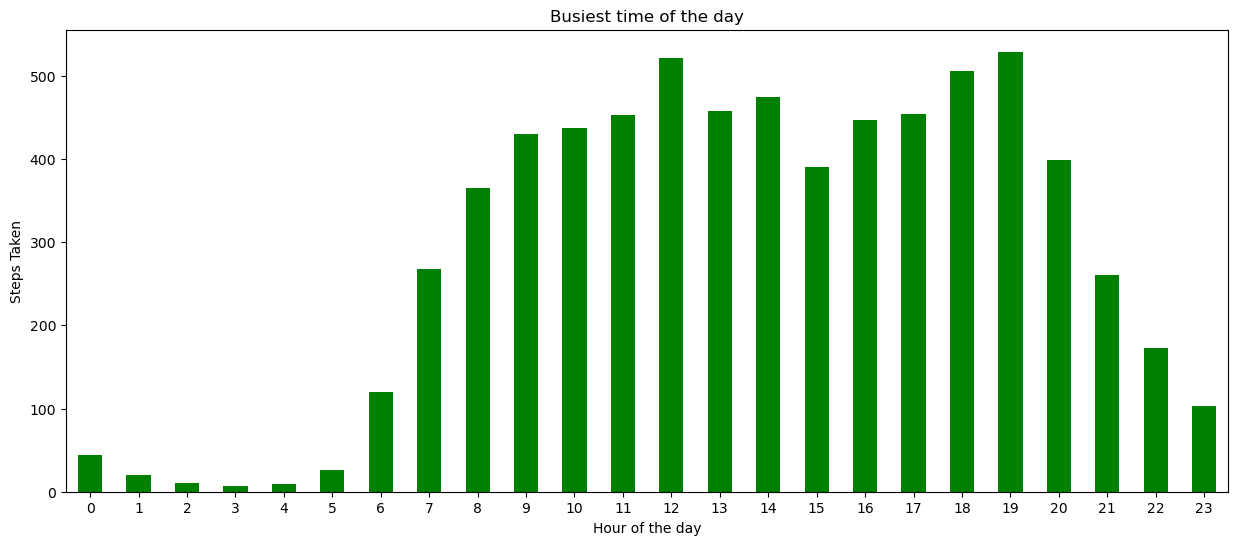

In [71]:
fig, axs = plt.subplots(figsize=(15, 6))
merged_hours.groupby(merged_hours['ActivityHour'].dt.hour)['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='green', title='Busiest time of the day')
plt.xlabel("Hour of the day")
plt.ylabel("Steps Taken")
plt.show()

In [72]:
#plot a graph of the steps taken by the day of the week

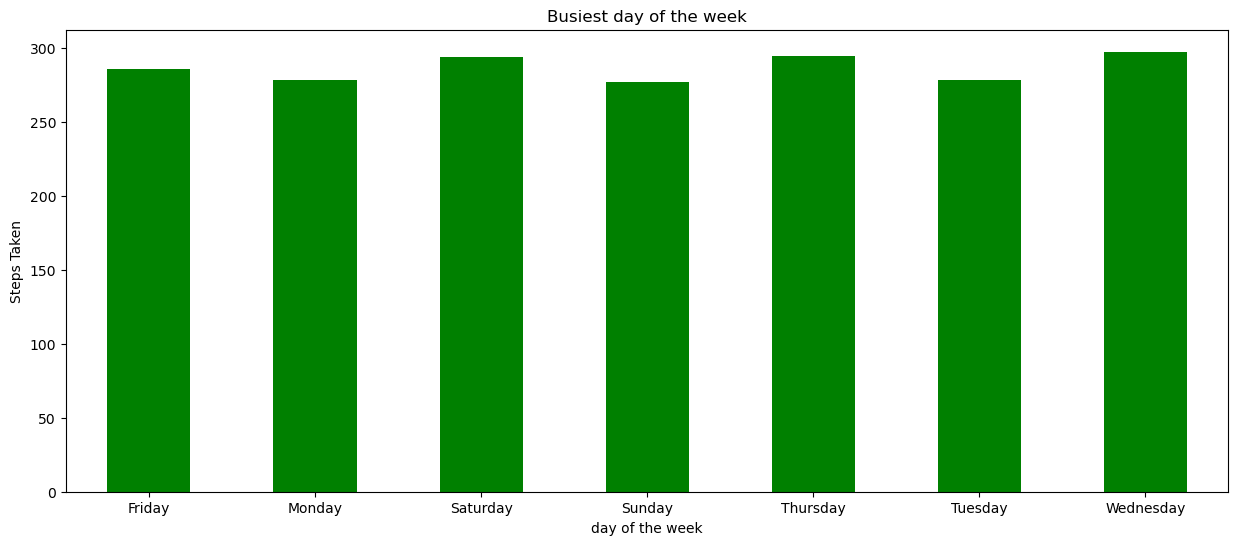

In [73]:
fig, axs = plt.subplots(figsize=(15, 6))
merged_hours.groupby(merged_hours['DayOfTheWeek'])['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='green', title='Busiest day of the week')
plt.xlabel("day of the week")
plt.ylabel("Steps Taken")
plt.show()

OBSERVING THE HEART RATE DATA 

In [75]:
d3 = pd.read_csv('heartrate_seconds_merged.csv')

In [76]:
d3.head()

,Id,Time,Value
0,2022484408,4/1/2016 7:54:00 AM,93
1,2022484408,4/1/2016 7:54:05 AM,91
2,2022484408,4/1/2016 7:54:10 AM,96
3,2022484408,4/1/2016 7:54:15 AM,98
4,2022484408,4/1/2016 7:54:20 AM,100


In [77]:
 #check for missing data 

In [78]:
d3.isnull().sum()

Id       0
Time     0
Value    0
dtype: int64

In [79]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154681 entries, 0 to 1154680
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Id      1154681 non-null  int64 
 1   Time    1154681 non-null  object
 2   Value   1154681 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.4+ MB


In [80]:
#data wrangling and manipulation

In [81]:
d3['Date'] = pd.to_datetime(d3['Time'])

In [82]:
d3['DayOfTheWeek']= pd.to_datetime(d3['Date'])
d3['DayOfTheWeek'] = d3['Date'].dt.day_name()
d3['ActivityHour'] = pd.to_datetime(d3['Date'], format='%I:%M:%S %p')
d3['Hour'] = d3['ActivityHour'].dt.hour

In [83]:
#observe to see if the changes has been made 

In [84]:
d3.head()

,Id,Time,Value,Date,DayOfTheWeek,ActivityHour,Hour
0,2022484408,4/1/2016 7:54:00 AM,93,2016-04-01 07:54:00,Friday,2016-04-01 07:54:00,7
1,2022484408,4/1/2016 7:54:05 AM,91,2016-04-01 07:54:05,Friday,2016-04-01 07:54:05,7
2,2022484408,4/1/2016 7:54:10 AM,96,2016-04-01 07:54:10,Friday,2016-04-01 07:54:10,7
3,2022484408,4/1/2016 7:54:15 AM,98,2016-04-01 07:54:15,Friday,2016-04-01 07:54:15,7
4,2022484408,4/1/2016 7:54:20 AM,100,2016-04-01 07:54:20,Friday,2016-04-01 07:54:20,7


In [85]:
#plot a graph showing the heart rate by the day of the week

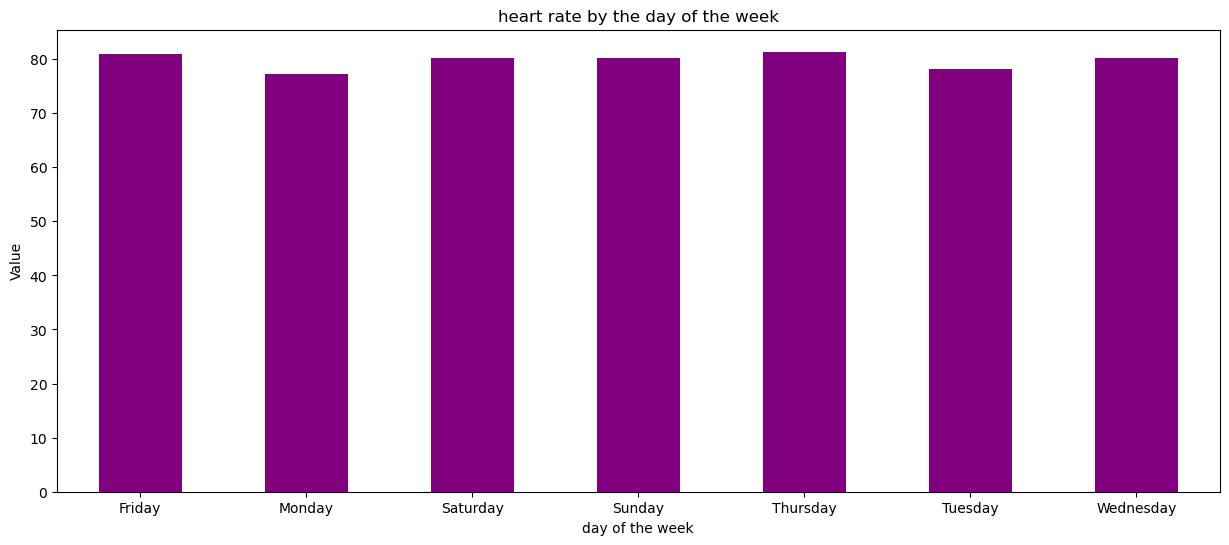

In [86]:
fig, axs = plt.subplots(figsize=(15, 6))
d3.groupby(d3['DayOfTheWeek'])['Value'].mean().plot(kind='bar', rot=0, ax=axs, color='purple', title='heart rate by the day of the week')
plt.xlabel("day of the week")
plt.ylabel("Value")
plt.show()

In [87]:
#plot a graph to show the heart rate by the hour 

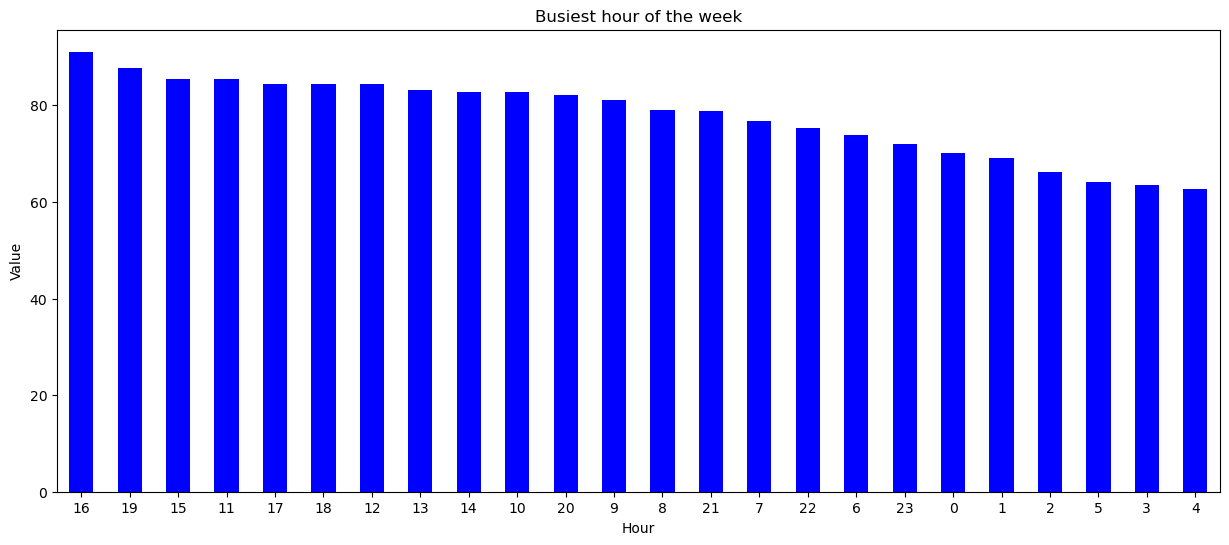

In [88]:
mean_values = d3.groupby(d3['Hour'])['Value'].mean()

# Step 2: Sort the mean values in descending order
sorted_mean_values = mean_values.sort_values(ascending=False)

# Step 3: Plot the sorted values
fig, axs = plt.subplots(figsize=(15, 6))
sorted_mean_values.plot(kind='bar', rot=0, ax=axs, color='blue', title='Busiest hour of the week')
plt.xlabel("Hour")
plt.ylabel("Value")
plt.show()

ANALYZE SLEEP DATA 

In [90]:
sleep_data = pd.read_csv('sleepDay_merged.csv')

In [91]:
sleep_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [93]:
sleep_data['DayOfTheWeek']= pd.to_datetime(sleep_data['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')
sleep_data['Day'] = sleep_data['DayOfTheWeek'].dt.day_name()
sleep_data['ActivityHour'] = pd.to_datetime(sleep_data['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')
sleep_data['Hour'] = sleep_data['DayOfTheWeek'].dt.hour

In [95]:
sleep_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,DayOfTheWeek,Day,ActivityHour,Hour
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12,Tuesday,2016-04-12,0
1,1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13,Wednesday,2016-04-13,0
2,1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15,Friday,2016-04-15,0
3,1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16,Saturday,2016-04-16,0
4,1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17,Sunday,2016-04-17,0


In [ ]:
#view the relationship between total minutes asleep and total time in bed 

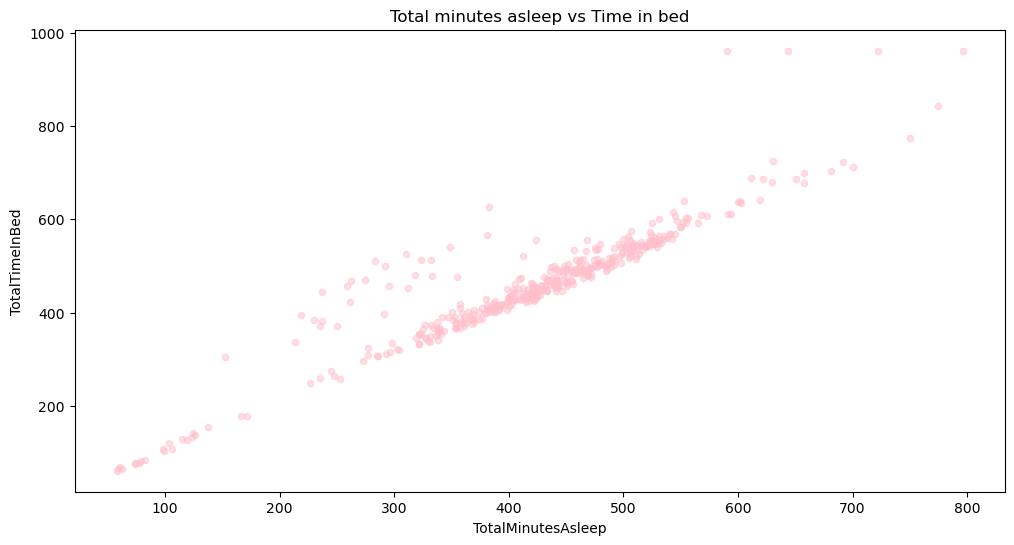

In [97]:
sleep_data.plot.scatter(x='TotalMinutesAsleep', y='TotalTimeInBed', color= 'pink', alpha = 0.5, figsize=(12,6))
plt.title('Total minutes asleep vs Time in bed')
plt.show()

In [99]:
#view the relationship between the total minutes asleep and the day of the week 

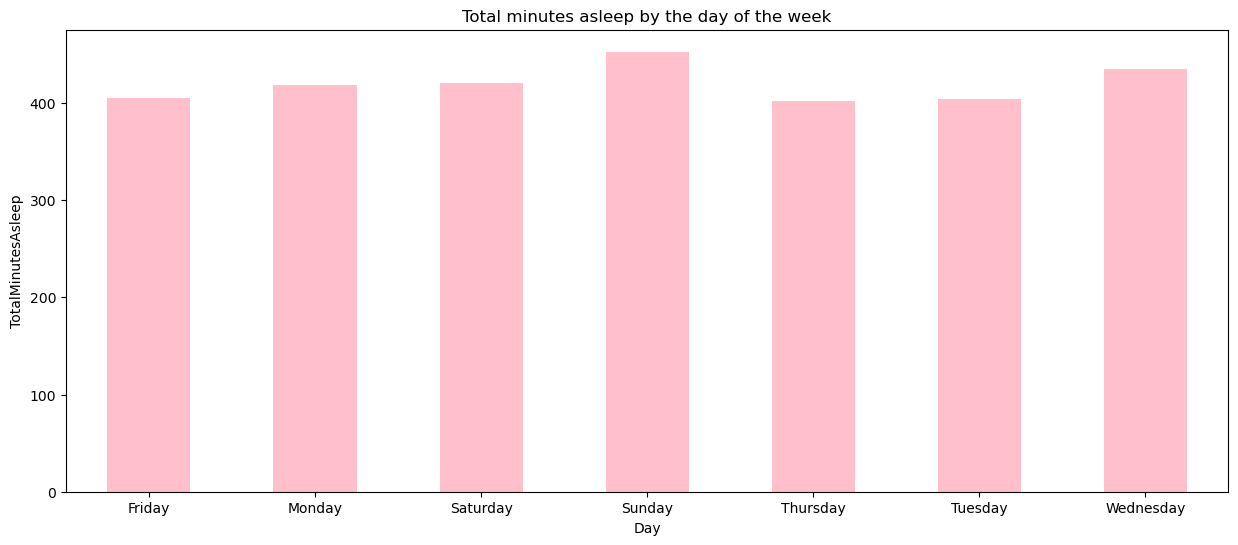

In [101]:
fig, axs = plt.subplots(figsize=(15, 6))
sleep_data.groupby(sleep_data['Day'])['TotalMinutesAsleep'].mean().plot(kind='bar', rot=0, ax=axs, color='pink', title='Total minutes asleep by the day of the week')
plt.xlabel("Day")
plt.ylabel("TotalMinutesAsleep")
plt.show()

observe the weight data

In [104]:
weight = pd.read_csv('WeightLogInfo_merged.csv')

In [106]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/5/2016 11:59:59 PM,53.299999,117.506384,22.0,22.969999,True,1459900799000
1,1927972279,4/10/2016 6:33:26 PM,129.600006,285.719105,NaN,46.169998,False,1460313206000
2,2347167796,4/3/2016 11:59:59 PM,63.400002,139.773078,10.0,24.770000,True,1459727999000
3,2873212765,4/6/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1459987199000
4,2873212765,4/7/2016 11:59:59 PM,57.200001,126.104416,NaN,21.650000,True,1460073599000


In [108]:
#Check for missing data 

In [110]:
weight.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               31
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [112]:
weight['Fat'] = weight['Fat'].fillna(weight['Fat'].mean())

In [114]:
#observe to see if the fat column has been filled with the mean 

In [116]:
weight.isnull().sum()

Id                0
Date              0
WeightKg          0
WeightPounds      0
Fat               0
BMI               0
IsManualReport    0
LogId             0
dtype: int64

In [118]:
#change the date format to include day of the week and hour 

In [120]:
weight['DayOfTheWeek']= pd.to_datetime(weight['Date'], format='%m/%d/%Y %I:%M:%S %p')
weight['Day'] = weight['DayOfTheWeek'].dt.day_name()
weight['ActivityHour'] = pd.to_datetime(weight['Date'], format='%m/%d/%Y %I:%M:%S %p')
weight['Hour'] = weight['ActivityHour'].dt.hour

In [122]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,DayOfTheWeek,Day,ActivityHour,Hour
0,1503960366,4/5/2016 11:59:59 PM,53.299999,117.506384,22.0,22.969999,True,1459900799000,2016-04-05 23:59:59,Tuesday,2016-04-05 23:59:59,23
1,1927972279,4/10/2016 6:33:26 PM,129.600006,285.719105,16.0,46.169998,False,1460313206000,2016-04-10 18:33:26,Sunday,2016-04-10 18:33:26,18
2,2347167796,4/3/2016 11:59:59 PM,63.400002,139.773078,10.0,24.770000,True,1459727999000,2016-04-03 23:59:59,Sunday,2016-04-03 23:59:59,23
3,2873212765,4/6/2016 11:59:59 PM,56.700001,125.002104,16.0,21.450001,True,1459987199000,2016-04-06 23:59:59,Wednesday,2016-04-06 23:59:59,23
4,2873212765,4/7/2016 11:59:59 PM,57.200001,126.104416,16.0,21.650000,True,1460073599000,2016-04-07 23:59:59,Thursday,2016-04-07 23:59:59,23


In [124]:
#observe the correlation between weight kg and BMI 

In [126]:
weight.groupby(weight['ActivityHour'].dt.hour)['WeightKg'].mean()

ActivityHour
6      85.800000
8      85.400002
18    129.600006
23     66.182609
Name: WeightKg, dtype: float64

In [128]:
weight.groupby(weight['ActivityHour'].dt.hour)['BMI'].mean()

ActivityHour
6     25.692500
8     25.559999
18    46.169998
23    24.863044
Name: BMI, dtype: float64

In [130]:
weight.groupby(weight['Id'])['WeightKg'].mean()

Id
1503960366     53.299999
1927972279    129.600006
2347167796     63.400002
2873212765     56.950001
2891001357     88.400002
4445114986     92.400002
4558609924     69.400002
4702921684     99.699997
6962181067     61.864286
8253242879     75.599998
8877689391     85.755556
Name: WeightKg, dtype: float64

In [132]:
weight.groupby(weight['Id'])['BMI'].mean()

Id
1503960366    22.969999
1927972279    46.169998
2347167796    24.770000
2873212765    21.550000
2891001357    25.030001
4445114986    35.009998
4558609924    27.139999
4702921684    26.110001
6962181067    24.155000
8253242879    29.549999
8877689391    25.677778
Name: BMI, dtype: float64

Observing minutes people sleep 

In [135]:
min_sleep = pd.read_csv('minuteSleep_merged.csv')

In [139]:
min_sleep.head()

,Id,date,value,logId
0,1503960366,3/13/2016 2:39:30 AM,1,11114919637
1,1503960366,3/13/2016 2:40:30 AM,1,11114919637
2,1503960366,3/13/2016 2:41:30 AM,1,11114919637
3,1503960366,3/13/2016 2:42:30 AM,1,11114919637
4,1503960366,3/13/2016 2:43:30 AM,1,11114919637


In [141]:
min_sleep.isnull().sum()

Id       0
date     0
value    0
logId    0
dtype: int64

In [143]:
min_sleep['DayOfTheWeek']= pd.to_datetime(min_sleep['date'], format='%m/%d/%Y %I:%M:%S %p')
min_sleep['Day'] = min_sleep['DayOfTheWeek'].dt.day_name()
min_sleep['ActivityHour'] = pd.to_datetime(min_sleep['date'], format='%m/%d/%Y %I:%M:%S %p')
min_sleep['Hour'] = weight['ActivityHour'].dt.hour

In [157]:
min_sleep.head()

,Id,date,value,logId,DayOfTheWeek,Day,ActivityHour,Hour
0,1503960366,3/13/2016 2:39:30 AM,1,11114919637,2016-03-13 02:39:30,Sunday,2016-03-13 02:39:30,23.0
1,1503960366,3/13/2016 2:40:30 AM,1,11114919637,2016-03-13 02:40:30,Sunday,2016-03-13 02:40:30,18.0
2,1503960366,3/13/2016 2:41:30 AM,1,11114919637,2016-03-13 02:41:30,Sunday,2016-03-13 02:41:30,23.0
3,1503960366,3/13/2016 2:42:30 AM,1,11114919637,2016-03-13 02:42:30,Sunday,2016-03-13 02:42:30,23.0
4,1503960366,3/13/2016 2:43:30 AM,1,11114919637,2016-03-13 02:43:30,Sunday,2016-03-13 02:43:30,23.0


In [159]:
print(min_sleep.nunique())

Id                 23
date            54523
value               3
logId             556
DayOfTheWeek    54523
Day                 7
ActivityHour    54523
Hour                4
dtype: int64


In [181]:
sleep = pd.DataFrame(min_sleep)
# Calculate duration as the difference between consecutive timestamps in seconds, and convert to minutes
min_sleep['Duration'] = min_sleep['ActivityHour'].diff().dt.total_seconds() / 60

C:\Users\oyede\AppData\Local\Temp\ipykernel_6352\3028467685.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(duration_by_id)).colors
C:\Users\oyede\AppData\Local\Temp\ipykernel_6352\3028467685.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(duration_by_id)).colors


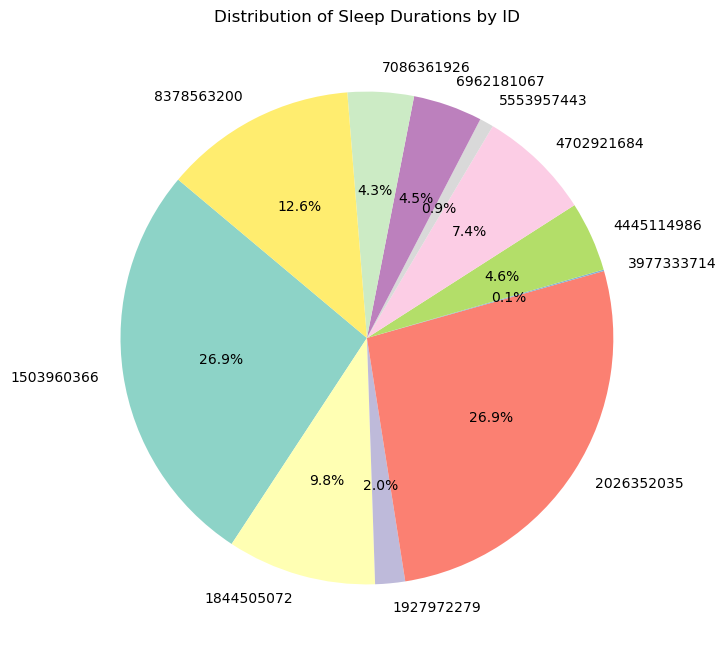

In [187]:
duration_counts = min_sleep['Duration'].value_counts()

duration_by_id = min_sleep.groupby('Id')['Duration'].sum()

# Define a colormap or list of colors
colors = plt.cm.get_cmap('Set3', len(duration_by_id)).colors

duration_by_id = duration_by_id[duration_by_id > 0]

# Define a colormap or list of colors
colors = plt.cm.get_cmap('Set3', len(duration_by_id)).colors

# Create the pie chart with different colors for each ID
plt.figure(figsize=(8, 8))
plt.pie(duration_by_id, labels=duration_by_id.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Sleep Durations by ID')
plt.show()